### Imports und Weissemodell

In [3]:
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import seaborn as sns
import pandas as pd
import qtb_plot

Could not load modelbase.assimulate. Sundials support disabled.


In [4]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

### Weisemodel über Zeit

In [15]:
valuesOneHundredTimeSteps, valuesLastTimeStep = [],[]
m = WeisseBaseModel()
s = modelbase.Simulator(m)
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
changedValuesOverTimeArray = s.timeCourse(np.linspace(0,100000,100),weise_values);
valuesOneHundredTimeSteps.append(changedValuesOverTimeArray)
valuesLastTimeStep.append(changedValuesOverTimeArray[-1])
print('3')


3


### Enzyme und Proteine mit jeweiligen Komplexen

In [16]:
werterandcr, wertetandct, wertemandcm, werteqandcq = [], [], [], []
for i, date in enumerate(valuesOneHundredTimeSteps[0]):
    werterandcr.append((valuesOneHundredTimeSteps[0][i][10])+(valuesOneHundredTimeSteps[0][i][6]))
    wertetandct.append((valuesOneHundredTimeSteps[0][i][11])+(valuesOneHundredTimeSteps[0][i][7]))
    wertemandcm.append((valuesOneHundredTimeSteps[0][i][12])+(valuesOneHundredTimeSteps[0][i][8]))
    werteqandcq.append((valuesOneHundredTimeSteps[0][i][13])+(valuesOneHundredTimeSteps[0][i][9]))
    

### Komplexe und Proteine über die Zeit gepoltet

In [36]:
qtb_plot.set("notebook")

In [1]:
fig, Plotlist = plt.subplots(2,2,figsize=(20,10))
Plotlist = Plotlist.ravel()

# Make data
data = pd.DataFrame({'group_A':werterandcr, 'group_B':wertetandct, 'group_C':wertemandcm, 'group_D':werteqandcq}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)

Plotlist[0].stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['Ribosome', 'Transportenzyme', 'metabolische Enzyme', 'wachstumsunabhängige Proteine'], colors = ['indianred','lightgreen','skyblue','tan'])
Plotlist[0].margins(0,0)
Plotlist[0].set_xlabel('Zeit', size = 15)
Plotlist[0].set_ylabel('Prozent', size = 15)



# Make data
data = pd.DataFrame({'group_A':werterandcramino, 'group_B':wertetandctamino, 'group_C':wertemandcmamino, 'group_D':werteqandcqamino}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 

Plotlist[1].stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['Ribosome', 'Transportenzyme', 'metabolische Enzyme', 'wachstumsunabhängige \n Proteine'], colors = ['indianred','lightgreen','skyblue','tan'])
Plotlist[1].margins(0,0)
Plotlist[1].legend(loc='center right',prop={'size': 20}, bbox_to_anchor=[1.7,-0.1])
Plotlist[1].set_xlabel('Zeit', size = 15)
Plotlist[1].set_ylabel('Prozent', size = 15)


# Make data
data = pd.DataFrame({'group_A':wertercrInh, 'group_B':wertetctInh, 'group_C':wertemcmInh,'group_D':werteqcqInh}, index=sinh.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)


Plotlist[2].stackplot(sinh.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"],data_perc["group_D"], labels=['ribosomes', 'transport enzymes', 'metabolic enzymes', 'house-keeping proteins'], colors = ['indianred','lightgreen','skyblue','tan'])
Plotlist[2].margins(0,0)
Plotlist[2].set_xlabel('Zeit', size = 15)
Plotlist[2].set_ylabel('Prozent', size = 15)

# Make data
data = pd.DataFrame({'group_A':werteqcqInhamino, 'group_B':wertemcmInhamino, 'group_C':wertetctInhamino, 'group_D':wertercrInhamino}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
Plotlist[3].stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['ribosome', 'transport enzyme', 'metabolic enzyme', 'house-keeping protein'],colors = ['indianred','lightgreen','skyblue','tan'])
Plotlist[3].margins(0,0)
Plotlist[3].set_xlabel('Zeit', size = 15)
Plotlist[3].set_ylabel('Prozent', size = 15)



NameError: name 'plt' is not defined

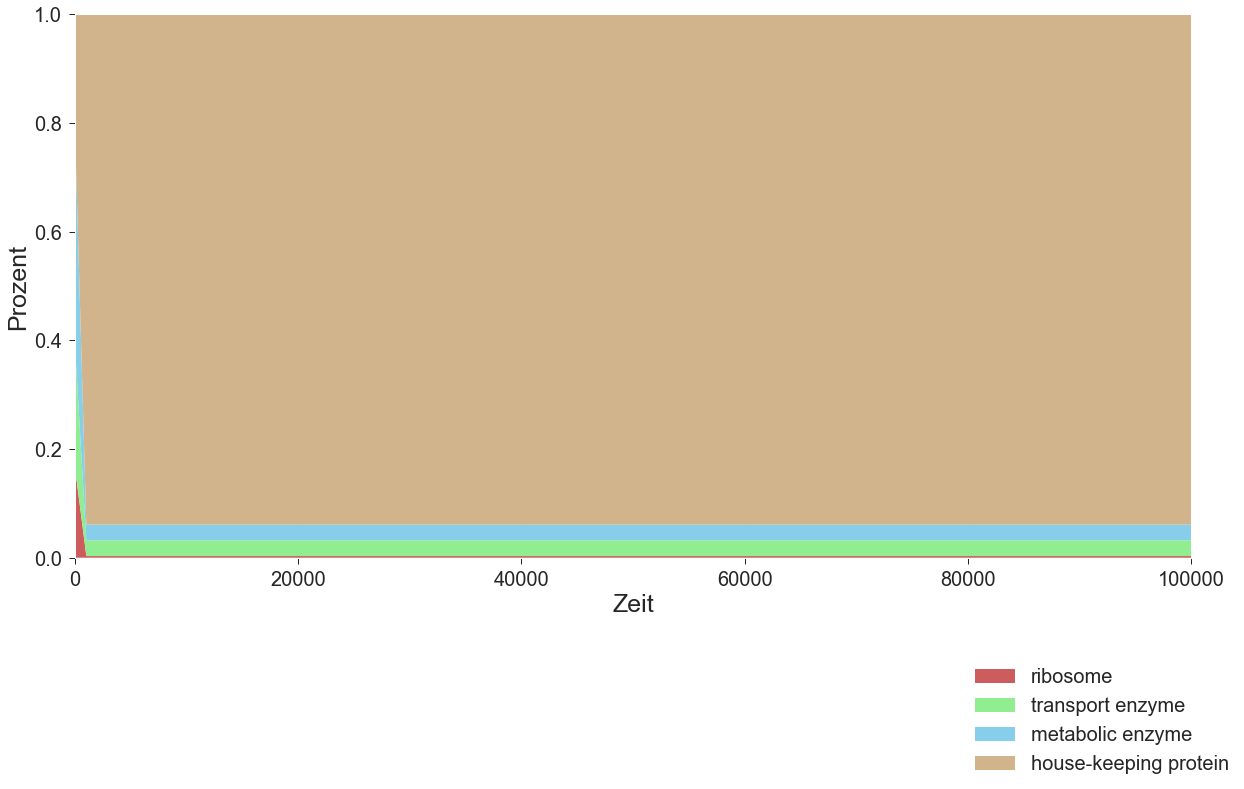

In [37]:
# Make data
data = pd.DataFrame({'group_A':werterandcr, 'group_B':wertetandct, 'group_C':wertemandcm, 'group_D':werteqandcq}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['ribosome', 'transport enzyme', 'metabolic enzyme', 'house-keeping protein'], colors = ['indianred','lightgreen','skyblue','tan'])
plt.legend(loc='center right',prop={'size': 20}, bbox_to_anchor=[1.05,-0.3])
plt.margins(0,0)
#plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('Zeit', size = 25)
plt.ylabel('Prozent', size = 25)
#plt.ylableticks()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

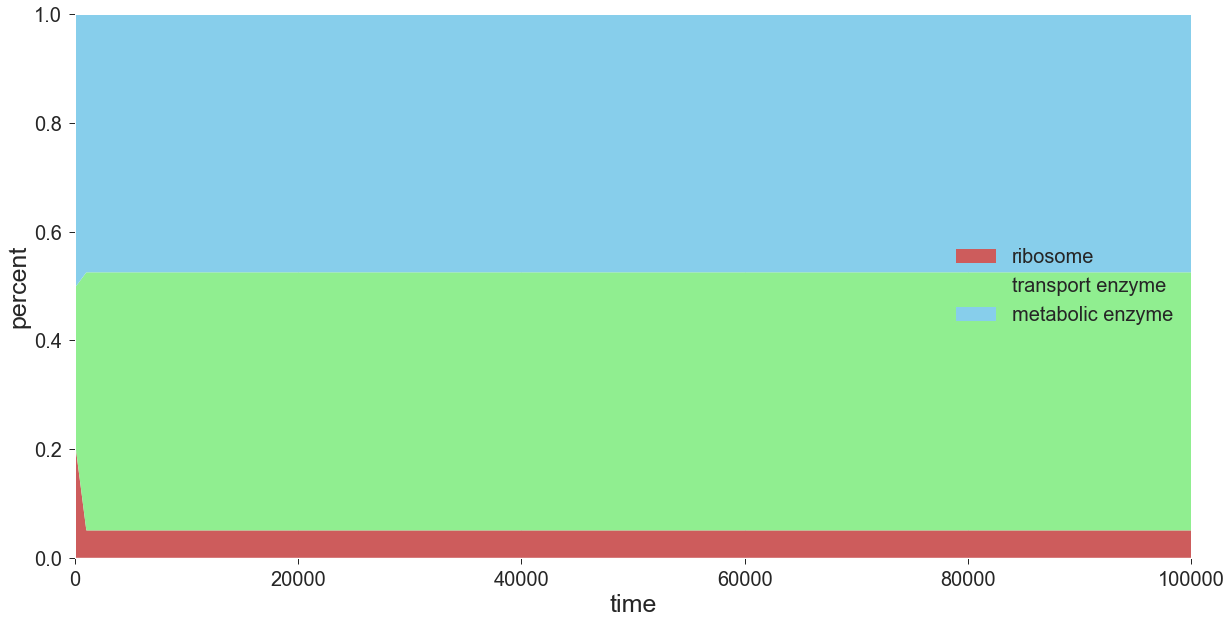

In [38]:
# Make data
data = pd.DataFrame({'group_A':werterandcr, 'group_B':wertetandct, 'group_C':wertemandcm }, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosome', 'transport enzyme', 'metabolic enzyme', 'house-keeping protein'], colors = ['indianred','lightgreen','skyblue','tan'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
#plt.ylableticks()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

### Proteine und Komplexe mit aminosäuren multipliziert

In [17]:
werterandcramino, wertetandctamino, wertemandcmamino, werteqandcqamino = [], [], [], []
for i, date in enumerate(valuesOneHundredTimeSteps[0]):
    werterandcramino.append(werterandcr[i]*7459)
    wertetandctamino.append(wertetandct[i]*300)
    wertemandcmamino.append(wertemandcm[i]*300)
    werteqandcqamino.append(werteqandcq[i]*300)

### Komplexe und Proteine mit aminosäuren multipliziert über die Zeit gepoltet

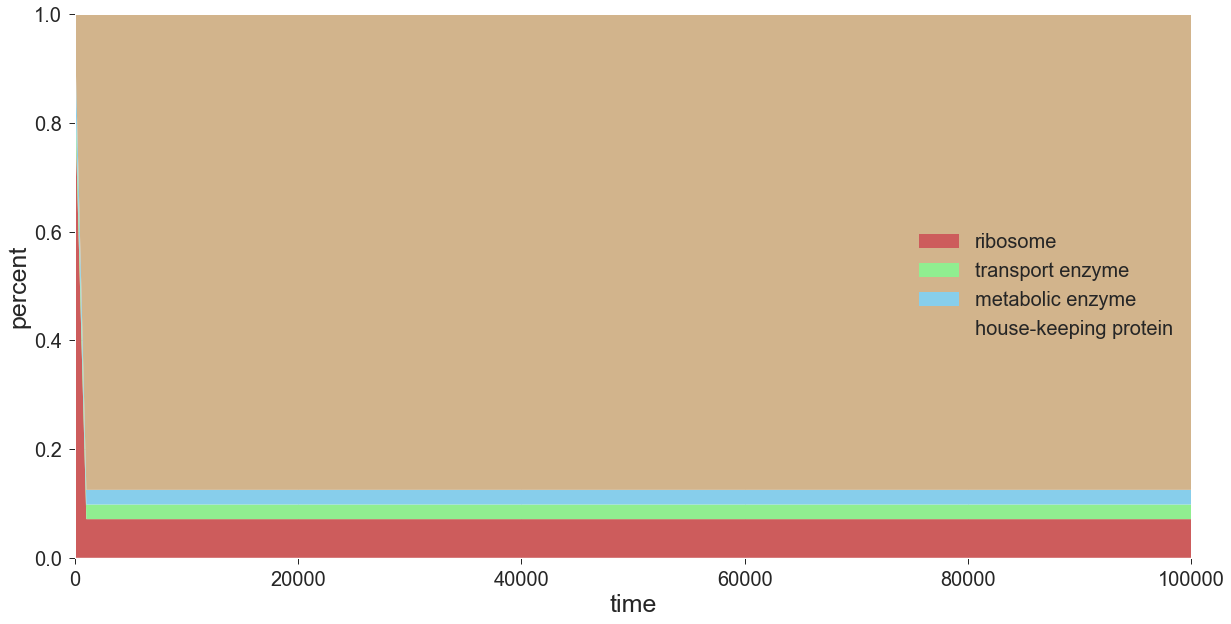

In [40]:
# Make data
data = pd.DataFrame({'group_A':werterandcramino, 'group_B':wertetandctamino, 'group_C':wertemandcmamino, 'group_D':werteqandcqamino}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10)) 
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['ribosome', 'transport enzyme', 'metabolic enzyme', 'house-keeping protein'], colors = ['indianred','lightgreen','skyblue','tan'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
#plt.ylableticks()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

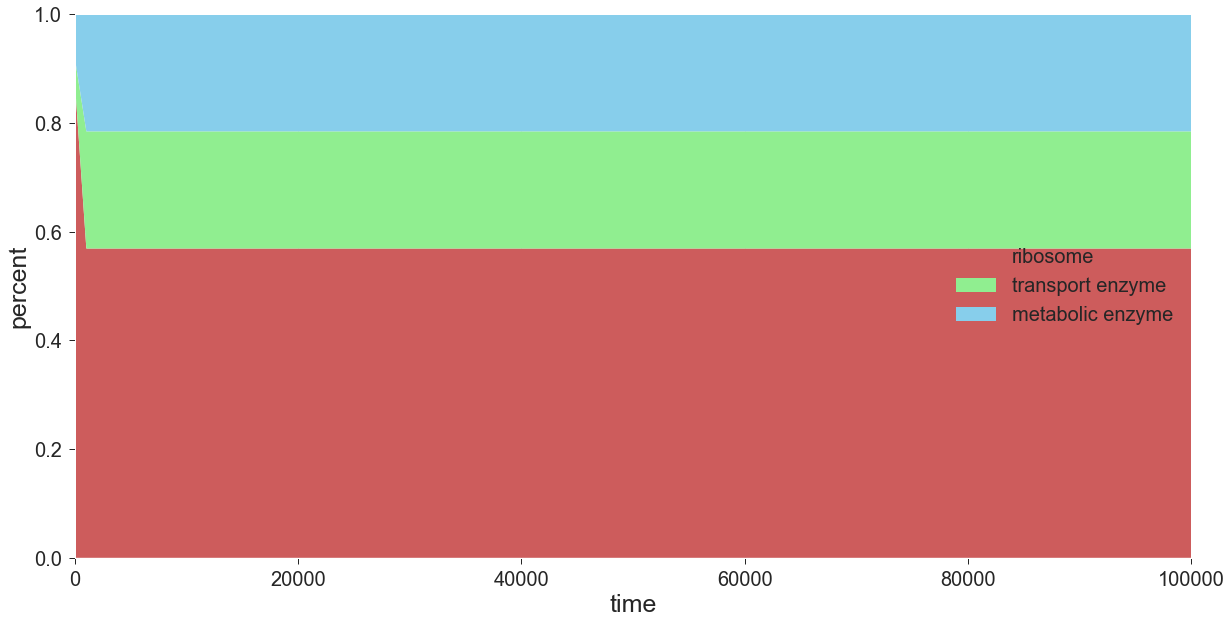

In [41]:
# Make data
data = pd.DataFrame({'group_A':werterandcramino, 'group_B':wertetandctamino, 'group_C':wertemandcmamino}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosome', 'transport enzyme', 'metabolic enzyme', 'house-keeping protein'], colors = ['indianred','lightgreen','skyblue','tan'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
#plt.ylableticks()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

# Nährstoffimport inhibiert

In [18]:
valuesOneHundredTimeStepsInh, valuesLastTimeStepInh = [],[]
minh = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

minh.par.update({'vt': 10})
sinh = modelbase.Simulator(minh)
changedValuesOverTimeArrayInh = sinh.timeCourse(np.linspace(0,100000,100),weise_values);
valuesOneHundredTimeStepsInh.append(changedValuesOverTimeArrayInh)
valuesLastTimeStepInh.append(changedValuesOverTimeArrayInh[-1])


### Enzyme und Proteine mit jeweiligen Komplexen nach Inhibierung

In [19]:
werteqcqInh, wertemcmInh, wertetctInh, wertercrInh = [], [], [], []
for i, date in enumerate(valuesOneHundredTimeStepsInh[0]):
    werteqcqInh.append((valuesOneHundredTimeStepsInh[0][i][13])+(valuesOneHundredTimeStepsInh[0][i][9]))
    wertemcmInh.append((valuesOneHundredTimeStepsInh[0][i][12])+(valuesOneHundredTimeStepsInh[0][i][8]))
    wertetctInh.append((valuesOneHundredTimeStepsInh[0][i][11])+(valuesOneHundredTimeStepsInh[0][i][7]))
    wertercrInh.append((valuesOneHundredTimeStepsInh[0][i][10])+(valuesOneHundredTimeStepsInh[0][i][6]))


### Komplexe und Proteine nach Inhibierung über die Zeit gepoltet

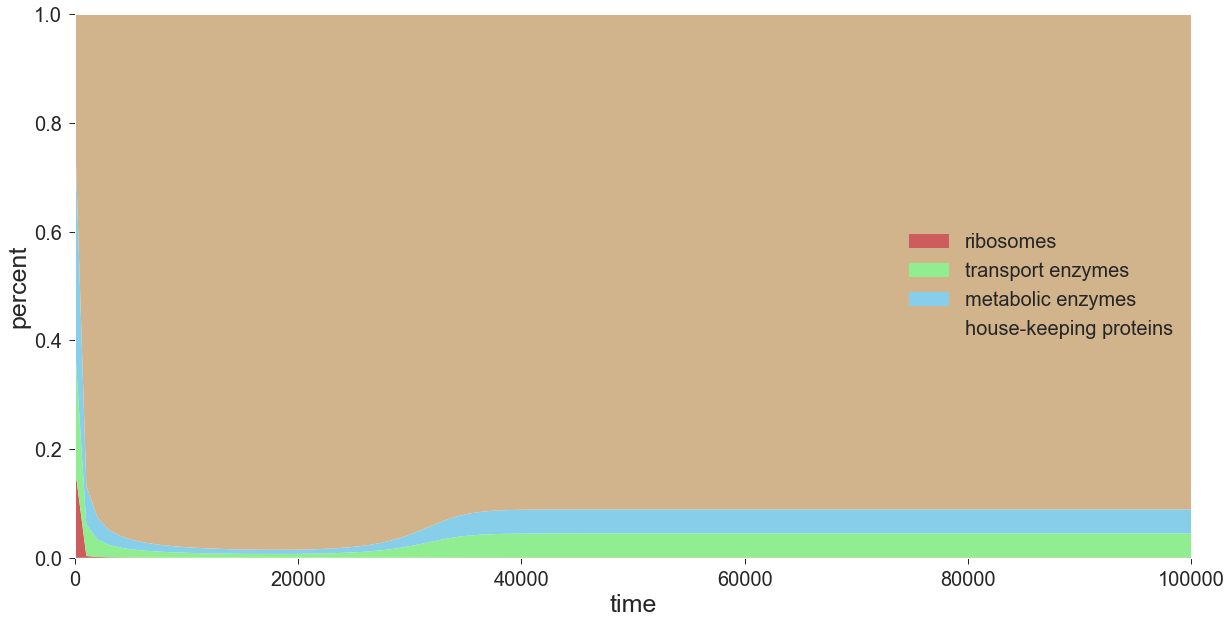

In [45]:
# Make data
data = pd.DataFrame({'group_A':wertercrInh, 'group_B':wertetctInh, 'group_C':wertemcmInh,'group_D':werteqcqInh}, index=sinh.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)

# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(sinh.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"],data_perc["group_D"], labels=['ribosomes', 'transport enzymes', 'metabolic enzymes', 'house-keeping proteins'], colors = ['indianred','lightgreen','skyblue','tan'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('Percent distribution of proteins and enzymes \n with inhibition of nutrient import', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

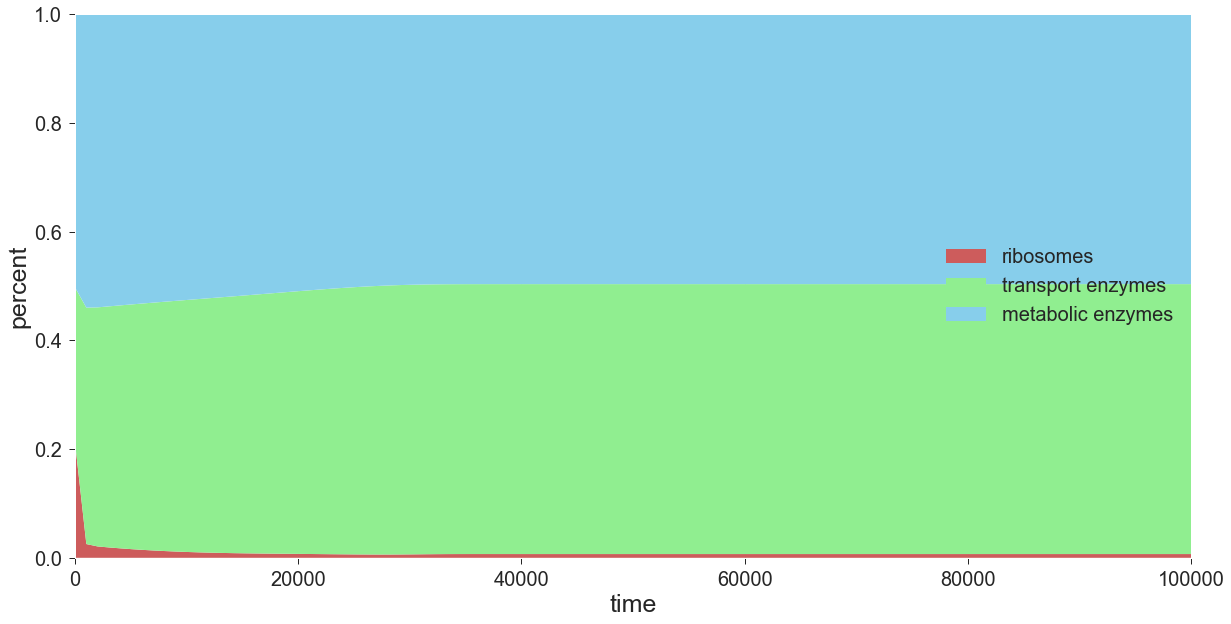

In [46]:
# Make data
data = pd.DataFrame({'group_A':wertercrInh, 'group_B':wertetctInh, 'group_C':wertemcmInh }, index=sinh.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)

# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(sinh.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosomes', 'transport enzymes', 'metabolic enzymes', 'house-keeping proteins'], colors = ['indianred','lightgreen','skyblue','tan'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('Percent distribution of proteins and enzymes \n with inhibition of nutrient import', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

### Proteine und Komplexe nach Inhibierung mit aminosäuren multipliziert

In [20]:
werteqcqInhamino, wertemcmInhamino, wertetctInhamino, wertercrInhamino = [], [], [], []
for i, date in enumerate(valuesOneHundredTimeStepsInh[0]):
    werteqcqInhamino.append(werteqcqInh[i]*300)
    wertemcmInhamino.append(wertemcmInh[i]*300)
    wertetctInhamino.append(wertetctInh[i]*300)
    wertercrInhamino.append(wertercrInh[i]*7459)

### Komplexe und Proteine nach Inhibierung mit aminosäuren multipliziert über die Zeit gepoltet

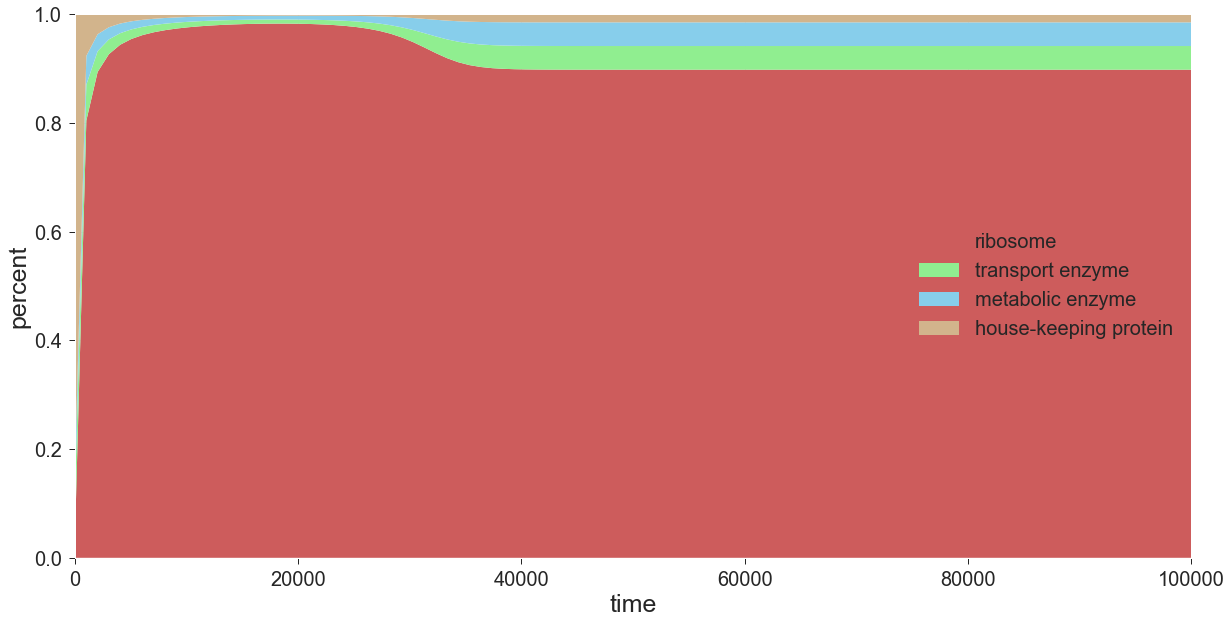

In [48]:
# Make data
data = pd.DataFrame({'group_A':werteqcqInhamino, 'group_B':wertemcmInhamino, 'group_C':wertetctInhamino, 'group_D':wertercrInhamino}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], data_perc["group_D"], labels=['ribosome', 'transport enzyme', 'metabolic enzyme', 'house-keeping protein'], colors = ['indianred','lightgreen','skyblue','tan'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
#plt.ylableticks()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

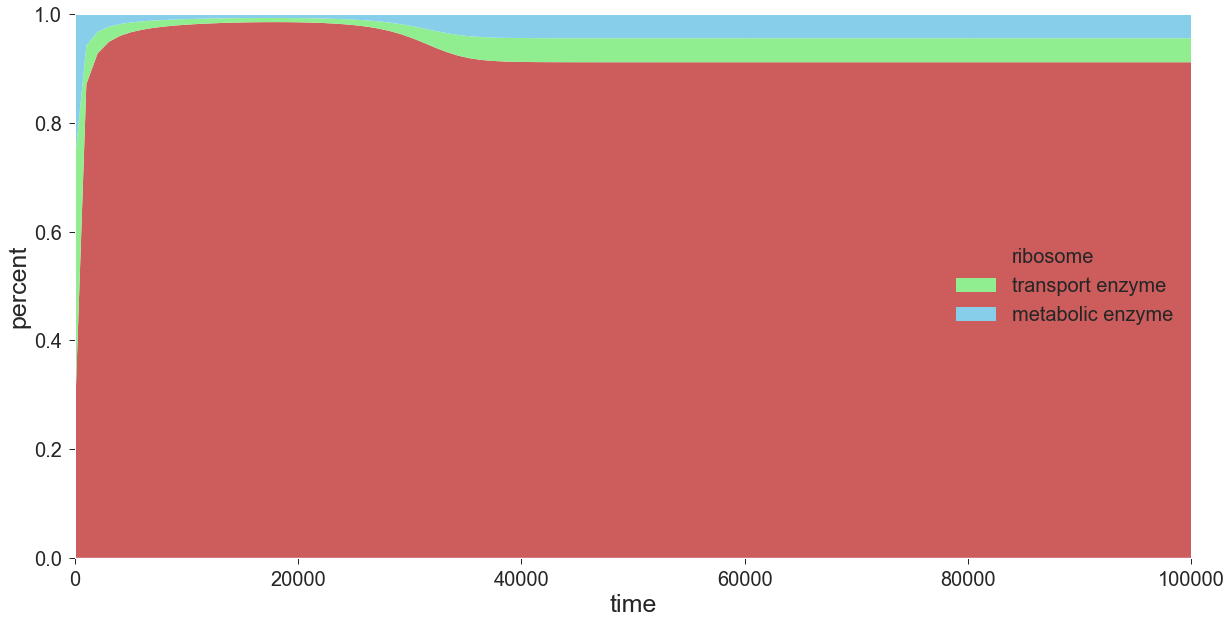

In [49]:
# Make data
data = pd.DataFrame({'group_A':werteqcqInhamino, 'group_B':wertemcmInhamino, 'group_C':wertetctInhamino}, index=s.getT())
 
# We need to transform the data from raw data to percentage (fraction)
data_perc = data.divide(data.sum(axis=1), axis=0)
 
# Make the plot
plt.figure(figsize=(20,10))
plt.stackplot(s.getT(),  data_perc["group_A"],  data_perc["group_B"],  data_perc["group_C"], labels=['ribosome', 'transport enzyme', 'metabolic enzyme', 'house-keeping protein'], colors = ['indianred','lightgreen','skyblue','tan'])
plt.legend(loc='center right',prop={'size': 20})
plt.margins(0,0)
#plt.title('prozentuale Verteilung der Proteine und Enzyme', size = 30)
plt.xlabel('time', size = 25)
plt.ylabel('percent', size = 25)
#plt.ylableticks()
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [2]:
# Data
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21) })


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.


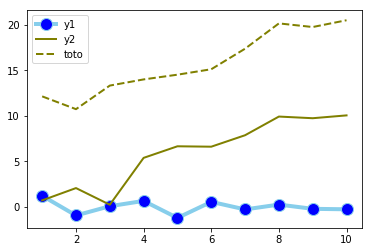

In [3]:
# multiple line plot
plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
plt.legend()
